**To predict and improve the Sales based on the Chemical Components and Quality of the Wine**

## Business Problem: 

Food Product or Beverages Sales are mainly based on the Quality and Taste. Better Quality and Quantity of each chemical component Will play vital role in taste of the wine which in turn gives good ratings and Increasing the Sales.Sales is an independent attribute dependent on the Quality and taste based on chemical components. This is Regression Technique on high level. The Main aim of this project is find the Component of the wine that reduces the Taste which in turn reduces the Sales of the Non Fortifed Wine and **Vinho Verde wine** major Exporter of wine in Portugal.(https://www.winesofportugal.com/de/press-room/statistics/export/). Below is the Graphical Representation. Im using the Different prediction techniques to find the quality and chemical componets of wine.

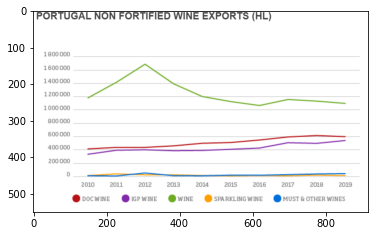

In [316]:
#Importing Matplot Lib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images from Jypyter files
img = mpimg.imread('Capture pre.PNG')
  
# Output Images
plt.imshow(img)

#### **Dataset**: https://archive.ics.uci.edu/ml/datasets/wine+quality 
(The data Set includes 6497 entries baseed on the chemical components of the wine)

In [317]:
#import libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [318]:
#import Warning and Modelling Libraries
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [319]:
#load the data into a dataframe
wine_df = pd.read_csv('RedWhiteWine.csv')

In [320]:
wine_df.head(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,R/W,quality
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,R,4
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,R,6
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,R,7
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,R,6
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6,R,6


In [321]:
# finding the information about the dataframe
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  R/W                   6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [322]:
# To describe the Data Frame in transpose
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215346,1.296417,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.445344,4.759973,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


**Defining the Upper and Lower Bounds for the Quality of the Wine

In [323]:
# Use IQR rule to identify Upper and Lower Bound
stat = wine_df.quality.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for quality prediction are {} and {}.'.format(upper, lower))

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
The upper and lower bounds for quality prediction are 7.5 and 3.5.


In [324]:
wine_good_df = wine_df[wine_df.quality > 7.5] 
total_count1 = wine_good_df['quality'].count()
print('Total Number of Instances Classified as Good Wine :',(total_count1))

Total Number of Instances Classified as Good Wine : 198


In [325]:
wine_bad_df = wine_df[wine_df.quality > 3.5]
total_count =wine_bad_df['quality'].count()
print('Total Number of Instances Classified as Bad Wine :' , total_count)

Total Number of Instances Classified as Bad Wine : 6467



The above Analysis tell us more number of instances i.e. 6467 are having a Quality less than 3.5. So majority of the chemical components are not in correct proportions.

## Scatter Plot to check the Linear relation between the attributes

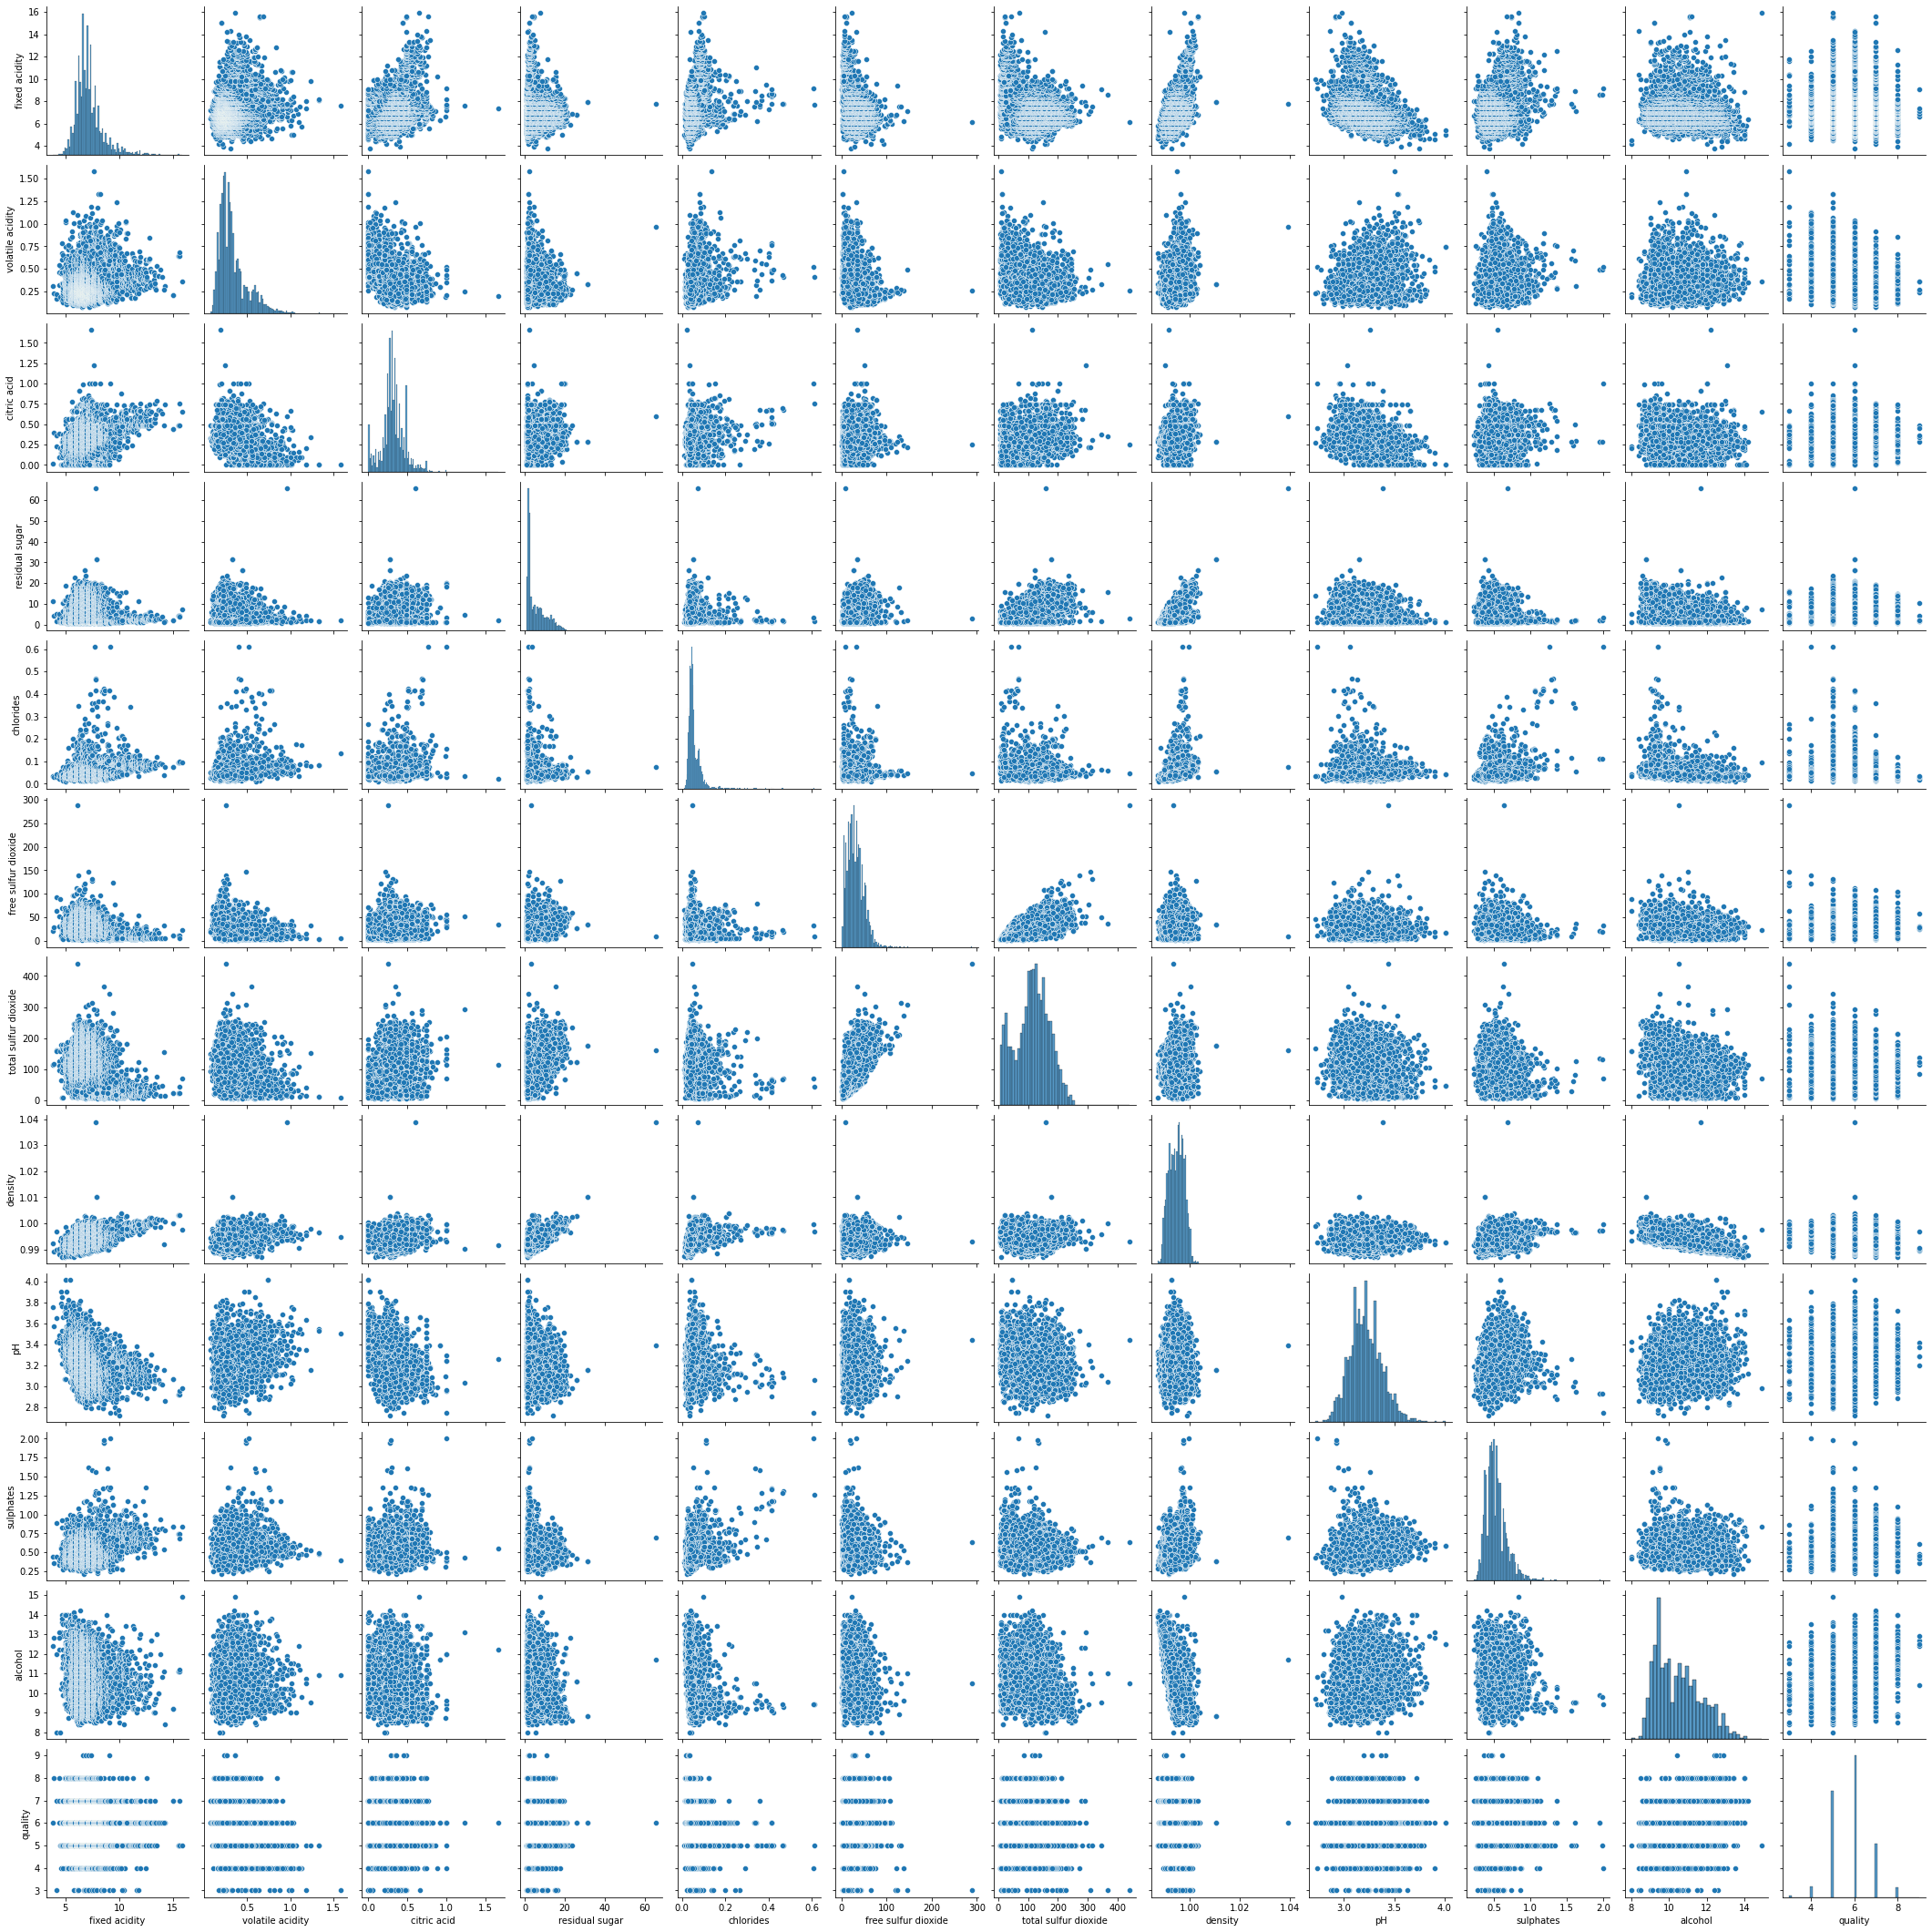

In [326]:
#scatterplot matrix for correlation between features and responses
sns.pairplot(wine_df)

### Prediction of the chemical components

In [327]:
# Since the Target Variable or the attribute is Quality we are finding the Correlation coefficient based on the Quality.
wine_corr = wine_df.corr()[['quality']].drop('quality')
print(wine_corr)

                       quality
fixed acidity        -0.076745
volatile acidity     -0.265699
citric acid           0.085532
residual sugar       -0.036949
chlorides            -0.200666
free sulfur dioxide   0.055463
total sulfur dioxide -0.041385
density              -0.305858
pH                    0.019506
sulphates             0.038485
alcohol               0.444274


Correlation Coefficient measures the strength of the linear relationship between two attributes. Based on the Positive and the Negetive Correlation coefficient we can increase or deacrease the chemical components to improve the taste and quality of Wine. As per the above analysis the checmical Component chlorides are having a negetive correlation. That means Chlorides give an Salty taste to the wine. Reduction of the 0.5 unit of Chlorides can improve the Quality and Taste of the wine. Let us see visual representation using heat map. Heat map helps to define the feature Correlated to improve the Quality of Wine which in turn Improves the Sales.The negetive Correlation is Inversely proportional to the Quality of the Wine. Whereas, Positive Correlation is Directly proportional to the Quality of Wine.

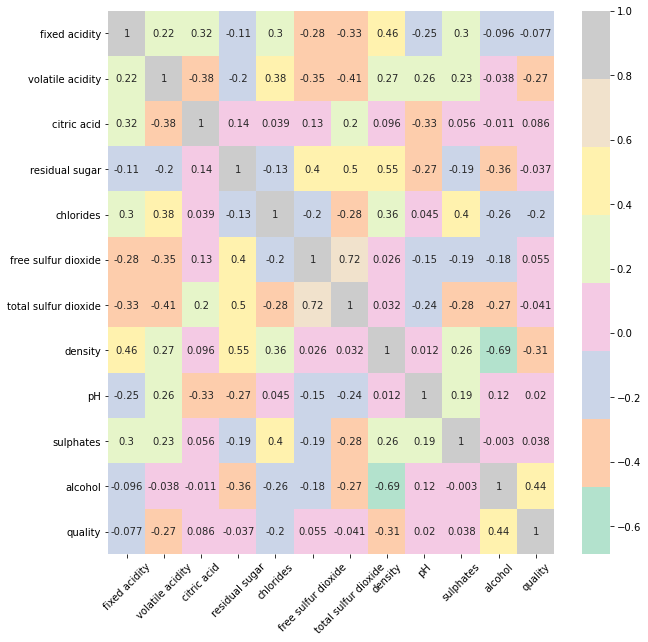

In [328]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(wine_df.corr(), cmap='Pastel2', annot=True)
plt.xticks(rotation=45)
plt.show()

### Creating a Baseline
**To Understand the Coeeficient and P Values

In [329]:
wine_df_new = wine_df.drop(['quality','R/W'], 1)
wine_df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1
1,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.99320,3.85,0.60,12.9
2,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0
3,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0
4,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.6


In [330]:
#Feature Matrix
X = wine_df_new
#Target Variable
Y = wine_df
y = wine_df["quality"]
print('Feature Column Count:', len(list(X)))
print('Target Column Count:', len(list(Y)))
print('Input Data Count:', len(X))
print('Target Data Count:', len(y))
print('Type of array:', type(X))
print('Type of array:', type(y))
#split my dataset into training and testing data where Im considing 30% of the Data and seperating from the training data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 465)
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))


Feature Column Count: 11
Target Column Count: 13
Input Data Count: 6497
Target Data Count: 6497
Type of array: <class 'pandas.core.frame.DataFrame'>
Type of array: <class 'pandas.core.series.Series'>
Training Data Count: 4547
Testing Data Count: 1950


In [331]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
print('Type of array:', type(X_1))
#Fitting sm.OLS model
model = sm.OLS(y, X_1).fit()

Type of array: <class 'pandas.core.frame.DataFrame'>


In [332]:
pd.DataFrame({'coef': round(model.params,3), 'p values': round(model.pvalues, 3)})

,coef,p values
const,55.674,0.000
fixed acidity,0.068,0.000
volatile acidity,-1.328,0.000
citric acid,-0.110,0.169
residual sugar,0.043,0.000
chlorides,-0.484,0.146
free sulfur dioxide,0.006,0.000
total sulfur dioxide,-0.002,0.000
density,-54.876,0.000
pH,0.439,0.000


**P-Values Determines the Quality of the Wine**

When P <0.05 then it is health promoting and good amount of Chemical Components. From the above data All the Chemical componets have P Value = 0. The Only Components that have P Value >0.05 are Citric Acid and Chlorides. This Citric acid gives a tangy taste to the Wine and Chrolides increase the salty content of the wine. So, as per the prediction it is better to reduce these contents in order to have good taste and better Sales.

In [333]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [334]:
#selected features
sel_feat = wine_df[backward_elimination(X,y)]
sel_feat.head(5)

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,4.6,0.52,2.1,8.0,65.0,0.99340,3.90,0.56,13.1
1,4.7,0.60,2.3,17.0,106.0,0.99320,3.85,0.60,12.9
2,4.9,0.42,2.1,16.0,42.0,0.99154,3.71,0.74,14.0
3,5.0,0.38,1.6,26.0,60.0,0.99084,3.70,0.75,14.0
4,5.0,0.40,4.3,29.0,80.0,0.99020,3.49,0.66,13.6


In [335]:
#check if multicollinearity exists
vif = pd.DataFrame()
X_const = sm.add_constant(sel_feat)
vif["features"] = X_const.columns
vif["VIF Factor"] = [round(variance_inflation_factor(X_const.values, i),3) for i in range(X_const.shape[1])]
vif

,features,VIF Factor
0,const,1628291.562
1,fixed acidity,4.542
2,volatile acidity,1.628
3,residual sugar,6.861
4,free sulfur dioxide,2.128
5,total sulfur dioxide,2.829
6,density,15.218
7,pH,2.425
8,sulphates,1.476
9,alcohol,4.742


VIF Factor can predict the multicollinearity. We can figure the Multicollinearity between two independent variables. VIF > 10 is considered highly collinear with the other variables in the model. VIF = 10 is considered as the tolerace recommendation. But In the above VIF factor for each chemical components the VIF of Density > 10 and this is the problematic VIF.
- = 1: Not correlated
- 1–5: Moderately correlated
- above 5: Highly correlated
- above 10: is a cause for concern
- The best PH of the wine is considered to be between 3 to 4. But 2.4 is also an acceptable pH
- The Density of the Wine is based on the Residual sugars and its fixed acidity. since the VIF factor for the the both components if greater than 2. So. the density is higher.

## Develop
 ##### Linear Regression Model
 
 - As per the above analysis chemical components of the wine are not in right proportion due to which there High VIF. So, Linear regression cannot be applied but still in order to prove the accuracy I have used the technique.

In [336]:
#create training and test vars
X_train, X_test, y_train, y_test = train_test_split(sel_feat, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4547, 9) (4547,)
(1950, 9) (1950,)


In [337]:
#fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
print("The first 5 predictied qualities: ", y_hat[0:5])

The first 5 predictied qualities:  [5.47130361 5.46271137 5.03144062 5.82262559 5.3669561 ]


Text(0.5, 1.0, 'Actual Values vs Predicted Values for Regression Model')

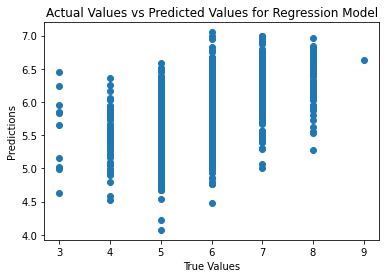

In [338]:
#plot the model
plt.scatter(y_test, y_hat)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Actual Values vs Predicted Values for Regression Model')

##### The scatter plot suggestes that it is negetively Linear and Moderatly Modelled.

In [339]:
#print MSE 
base_predictions = lm.predict(X_test)
print('Mean Squared Error of the baseline prediction model:', mean_squared_error(y_test, y_hat))
#print R-Squared
score = r2_score(y_test, y_hat)
print('R-squared of the baseline model:', score)

Mean Squared Error of the baseline prediction model: 0.5477794472916918
R-squared of the baseline model: 0.29639278847185924


Since the VIF > 10 the Linear regression R- Squred is also Too low which is 20% acurately modelled. Since MSE = o.53 this model has an average performance. Lower the MSE then the Models are correctly Modelled.

### Conclusion

- The Chemical Components Such chlorides and Sulphates and residual sugar are high in content. Due to the negetive correlation the quality of the wine is not good. so the chemical componets must be in correct proportion to improve the tate and quality of wine. This will can be obtained by reducing the chlorides and citric acid.